$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\def\lc{\left\lceil}$$
$$\def\rc{\right\rceil}$$
# Variational Quantum Eigensolver (VQE)

Optimization is a universal problem. We aim to optimize just about anything in todays society. Often it comes down to combinatorial solutions, such as simply finding the combination of inputs which produce lowest risk, cost, or highest returns. If we can represent the input space to our optimization problem as a matrix, where the entries of the matrix represent the *energy* of the state, then we can efficiently measure the expectation values which optimize our solution.

Formally, the Variational Quantum Eigensolver (VQE) is designed to solve problems that can be cast in the form of finding the ground-state energy $E_{GS}$ of a Hamiltonian $H$. The ground-state energy is precisely the smallest *eigenvalue* of the Hamiltonian representing the system,

$$H\ket{\psi_{GS}} = E_{GS}\ket{\psi_{GS}}.$$

The objective of the VQE is then to find the set of quantum operators that prepares the ground-state energy (minima) of a close approximation to some target observable. 

Ok, but what is a Hamiltonian matrix $H$? What is the *variational method* of quantum mechanics? And why does our system need to be represented as such? Lets go through some mathematical background so that we may understand the VQE.


---
An eigenvector $\ket{\psi_i}$ of a matrix $A$ is invariant under transformation by $A$ up to a scalar multiplicative constant (the eigenvalue $\lambda_i$), meaning,

$$A\ket{\psi_i} = \lambda_i\ket{\psi_i}.$$

In quantum mechanics, the Hamiltonian matrix $H$ corresponds to the sum of the energies of a system. The general form of the Hamiltonian is the simple case of 

$$H = \sum_{i=1}^N \hat{H}_i$$

where $N$ is the number of considered particles. It can also be expressed by the Schrödinger equation, where it generates a time evolution of quantum states as follows

$$H\ket{\psi(t)} = i\hslash\frac{\partial}{\partial t}\ket{\psi(t)}$$

but this way of expressing it is not exactly interesting to us for now. However, if the matrix $H$ is equal to its own conjugate transpose,

$$H=H^†,$$

then it is referred to as being Hermitian. Furthermore, the *spectral theorem* state that any eigenvalue of the Hermitian matrix $H$ must be real, and as such, all eigenvalues of $H$ have the property that

$$\lambda_i=\lambda_i^*.$$

Since any measurable quantity must be real, Hermitian matrices are suitable for describing the Hamiltonian $H$ of a quantum system. 


---
With the mathematical background presented, we now know that we can express the Hamiltonian $H$ representing our quantum system as

$$H = \sum_{i=1}^N \lambda_i\ket{\psi_i}\bra{\psi_i}$$

where each $\lambda_i$ is the eigenvalue corresponding to the specific eigenvector $\ket{\psi_i}$. The expectation value of the observable $H$ on the quantum state $\ket{\psi}$ which we are seeking to optimize is given by

$$⟨ H ⟩_\psi \equiv \bra{\psi}H\ket{\psi}.$$

We know how to represent the Hamiltonian $H$ as a weighted sum of its eigenvectors, which becomes,
$$⟨ H ⟩_\psi = \bra{\psi}H\ket{\psi} = \bra{\psi}\biggl(\sum_{i=1}^N \lambda_i\ket{\psi_i}\bra{\psi_i}\biggr)\ket{\psi}$$

$$ = \sum_{i=1}^N \lambda_i\braket{\psi}{\psi_i}\braket{\psi_i}{\psi}$$

$$ = \sum_{i=1}^N \lambda_i|\braket{\psi_i}{\psi}|^2.$$

The last expression shows how the expectation value of an observable on the arbitrary state $\psi$ can be expressed as a linear combination using the eigenvalues associated with the Hamiltonian $H$. Furthermore, we know that each of the weights in the linear combination is greater than or equal to $0$, since $|\braket{\psi_i}{\psi}|^2\geq0$. Thus it becomes clear that the following is true

$$\lambda_{\text{min}} \leq ⟨ H ⟩_\psi = \bra{\psi}H\ket{\psi} =  \sum_{i=1}^N \lambda_i|\braket{\psi_i}{\psi}|^2.$$

This is known as the *variational method*. What this implies is that the expectation value of any wave function will **always** be at least the minimum eigenvalue associated with $H$.


---
When the Hamiltonian of the quantum system is described by the Hermitian $H$, then we know that the ground-state energy of that system $E_{GS}$ is precisely the smallest eigenvalue $\lambda_{GS}$ associated with $H$.

The VQE algorithm starts by selecting any wave function $\ket{\psi}$, called *ansatz*, as an initial guess for $\ket{\psi_{GS}}$. The expectation value $⟨ H ⟩_\psi$ is then calculated, and the wave function $\ket{\psi}$ is iteratively updated such that we can get arbitrarily tight bounds on the real ground-state energy of the Hamiltonian $H$.

A systematic approach to varying the ansatz is required to implement the variational method on a real quantum computer. VQE does so by parametrizing the quantum circuit with a fixed form $\theta$. It is often represented by the linear transform with a unitary operator $U(\theta)$.

Iterative optimization over $\ket{\psi(\theta)}$ aims to yield an expectation value 

$$\bra{\psi(\theta)}H\ket{\psi(\theta)} \approx E_{GS} \equiv \lambda_{\text{min}}$$

where, ideally, $\ket{\psi(\theta)}$ will be close to $\ket{\psi_{\text{min}}}$. Furthermore, a fixed variational form with a polynomial number of parameters can only generate transformations to a polynomially sized subspace of all the states in the exponentially sized Hilbert space.

It is worth emphasizing that the ability to generate an arbitrary state ensures that during the optimization process, the variational form does not limit the set of attainable states over which the expectation value of $H$ can be taken.


---
The steps of the VQE algorithm are the following:

1. Map the problem that you wish to solve to finding the ground-state energy of a Hamiltonian $H$, where $\alpha_i$ are numerical coefficients and $\hat{P}_i$ are Pauli strings representing Pauli operations, on the form,

$$H = \sum_{i=1}^N \lambda_i\ket{\psi_i}\bra{\psi_i} = \sum_{i=1}^N \alpha_i\hat{P}_i$$

2. Prepare the *ansatz*, trial state $\ket{\psi(\theta)}$, set by a collection of parameters $\theta$.

3. Measure expectation values of the Pauli strings in the Hamiltonian, i.e., measure 

$$E[\psi(\theta)]P_\alpha\psi(\theta).$$

4. Calculate the energy $E$ corresponding to the trial state, by summing up the results of the measurements in the preceding step, 

$$E=\Sigma_\alpha h_\alpha E[\psi(\theta)]P_\alpha\psi(\theta).$$

5. Update the parameters $\theta$ based on the result (and results in the preivous iterations).


Steps 2 and 3 are run on a quantum computer, which handles the quantum states more efficiently than a classical computer. Steps 4 and 5 are done on a classical computer. The algorithm iteratively starts over from step 2 after step 5 and continues to iterate until some convergence criterion is met, indicating that the ground-state energy $E_{GS}$ has been found.

---
## Portfolio optimization

We aim to solve the following mean-variance portfolio optimization problem for $n$ assets:

$$\begin{split}\begin{aligned}
\min_{x \in \{0, 1\}^n}  q x^T \Sigma x - \mu^T x\\
\text{subject to: } 1^T x = B
\end{aligned}\end{split}$$

where $x \in \{0, 1\}^n$ denotes the vector of binary decision variables, $\mu \in \mathbb{R}^n$ defines the expected returns for the assets, $\Sigma \in \mathbb{R}^{n \times n}$ specifies the covariances between the assets, $q > 0$ controls the risk appetite of the decision maker, and $B$ denotes the budget, i.e., the number of assets to be selected out of $n$.

We assume the simplification that all assets have the same price (normalized to $1$), and the full budget $B$ has to be spent. The equality constraint $1^T x = B$ is mapped to the penalty term $(1^T x - B)^2$ which is scaled by a parameter and subtracted from the objective function. We map the resulting problem to a Hamiltonian $H$ whose ground-state energy corresponds to the optimal solution $\ket{\psi_{\text{min}}}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from qiskit import Aer
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit.utils import algorithm_globals
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo


In [2]:
# Define the problem instance, set the number of assets/qubits.
# The below link shows how one can extend this notebook to use
# real financial data for portfolio optimization.
# https://qiskit.org/documentation/finance/tutorials/11_time_series.html
num_assets = 4
seed = 1581958915

# Generate the expected return and covariance matrix from time-series
stocks = [(f'TICKER{i}') for i in range(num_assets)]
data = RandomDataProvider(
    tickers=stocks,
    start=datetime.datetime(2016, 1, 1),
    end=datetime.datetime(2016, 1, 30),
    seed=seed,
)
data.run()

mu = data.get_period_return_mean_vector()
sigma = data.get_period_return_covariance_matrix()


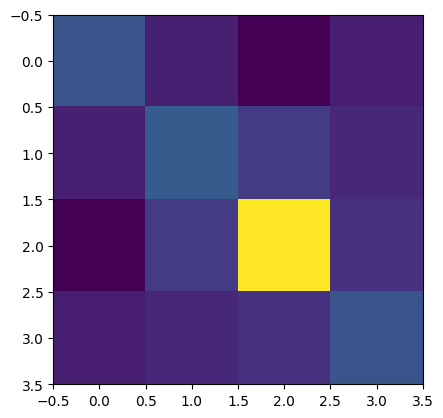

In [3]:
display(plt.imshow(sigma, interpolation='nearest'))


In [4]:
# Set the risk factor, budget, and penalty terms.
q = 0.5
B = num_assets // 2
P = num_assets

portfolio = PortfolioOptimization(
    expected_returns=mu,
    covariances=sigma,
    risk_factor=q,
    budget=B
)
qp = portfolio.to_quadratic_program()
display(qp)


<QuadraticProgram: minimize 7.033841470679481e-05*x_0^2 - 2.0946096283823185e-..., 4 variables, 1 constraints, 'Portfolio optimization'>

In [8]:
# Define some utility functions for prettier printing.

def index_to_selection(i, n):
    s = '{0:b}'.format(i).rjust(n)
    x = np.array(
        [1 if s[i] == '1' else 0 for i in reversed(range(n))]
    )
    return x

def print_result(result, qp, n):
    selection = result.x
    value = result.fval
    print(f'Optimal: selection {selection}, value {value:.4f}')
    
    eigenstate = result.min_eigen_solver_result.eigenstate
    eigenvector = eigenstate
    if not isinstance(eigenstate, np.ndarray):
        eigenvector = eigenstate.to_matrix()
    
    probs = np.abs(eigenvector) ** 2
    i_sorted = reversed(np.argsort(probs))
    print("\n----------------- Full result ---------------------")
    print("selection\tvalue\t\tprobability")
    print("---------------------------------------------------")
    
    for i in i_sorted:
        x = index_to_selection(i, n)
        value = QuadraticProgramToQubo().convert(qp).objective.evaluate(x)
        prob = probs[i]
        print(f'{x}\t{value:.4f}\t{prob:.6f}')
    

In [9]:
# Lets solve the problem, first classically.

exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)

result = exact_eigensolver.solve(qp)

print_result(result, qp, num_assets)


Optimal: selection [0. 1. 0. 1.], value -0.0072

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[0 1 0 1]	-0.0072	1.000000
[1 1 1 1]	4.0328	0.000000
[0 1 1 1]	1.0020	0.000000
[1 0 1 1]	1.0064	0.000000
[0 0 1 1]	-0.0035	0.000000
[1 1 0 1]	1.0028	0.000000
[1 0 0 1]	-0.0026	0.000000
[0 0 0 1]	1.0083	0.000000
[1 1 1 0]	1.0036	0.000000
[0 1 1 0]	-0.0063	0.000000
[1 0 1 0]	-0.0019	0.000000
[0 0 1 0]	1.0091	0.000000
[1 1 0 0]	-0.0055	0.000000
[0 1 0 0]	1.0054	0.000000
[1 0 0 0]	1.0101	0.000000
[0 0 0 0]	4.0418	0.000000


In [10]:
# Now lets solve it using the Variational Quantum Eigensolver VQE.
# We use the Constrained Optimization By Linear Approximation (COBYLA)
# optimizer for the classical optimization of our parameters.

algorithm_globals.random_seed = seed
backend = Aer.get_backend('statevector_simulator')

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
ry = TwoLocal(num_assets, 'ry', 'cz', reps=3, entanglement='full')
quantum_instance = QuantumInstance(
    backend=backend,
    seed_simulator=seed,
    seed_transpiler=seed,
)
vqe_mes = VQE(
    ry,
    optimizer=cobyla,
    quantum_instance=quantum_instance,
)
vqe = MinimumEigenOptimizer(vqe_mes)
result = vqe.solve(qp)

print_result(result, qp, num_assets)


Optimal: selection [0. 1. 0. 1.], value -0.0072

----------------- Full result ---------------------
selection	value		probability
---------------------------------------------------
[1 0 1 0]	-0.0019	0.517614
[0 1 0 1]	-0.0072	0.378536
[1 0 0 1]	-0.0026	0.096380
[0 1 1 0]	-0.0063	0.003440
[1 1 0 0]	-0.0055	0.002076
[0 0 1 1]	-0.0035	0.001693
[0 1 0 0]	1.0054	0.000127
[1 0 1 1]	1.0064	0.000091
[1 0 0 0]	1.0101	0.000016
[0 1 1 1]	1.0020	0.000009
[1 1 1 1]	4.0328	0.000008
[1 1 0 1]	1.0028	0.000006
[0 0 0 1]	1.0083	0.000004
[0 0 1 0]	1.0091	0.000001
[1 1 1 0]	1.0036	0.000000
[0 0 0 0]	4.0418	0.000000


## TODO, use real stock time-series data

...
